<a href="https://colab.research.google.com/github/SYKIM5396/Airline_Satisfaction/blob/main/Part1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas-profiling==3.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport

%matplotlib inline
plt.rcParams["figure.dpi"] = 144

# **1.문제 정의 및 가설 설정**

## 데이터셋 선정

고객의 만족도를 타겟으로 가지는 비행 만족도 설문조사 자료를 선정했습니다.  
이 데이터는 미국의 한 항공사에서 실시한 고객 만족도 설문조사 자료이며, 10만개 가량의 샘플을 가지고 있습니다.
데이터의 자세한 설명은 아래와 같습니다.

**Data Description**<br>
Gender: 승객의 성별 (Female, Male)<br>
Customer Type: Loyal customer : 충성고객,  disloyal customer : 비충성고객)<br>
Age: 승객의 나이<br>
Type of Travel: 승객의 여행 목적 (Personal Travel, Business Travel)<br>
Class: 비행기 좌석 등급 (Business, Eco, Eco Plus)<br>
Flight distance: 비행 거리(miles)<br>
Inflight wifi service: 기내 와이파이 서비스에 대한 만족도 (0:해당없음;1-5)<br>
Departure/Arrival time convenient: 출발/도착 시간의 편리함<br>
Ease of Online booking: 온라인 예약 만족도<br>
Gate location: 게이트 위치 만족도<br>
Food and drink: 식음료 만족도<br>
Online boarding: 온라인 탑승수속 만족도<br>
Seat comfort: 착석감 만족도<br>
Inflight entertainment: 기내 엔터테인먼트 만족도<br>
On-board service: On-board 단말 서비스 만족도<br>
Leg room service: 레그룸 만족도<br>
Baggage handling: 수하물 처리 만족도<br>
Check-in service: 탑승수속 만족도<br>
Inflight service: 기내 서비스 만족도<br>
Cleanliness: 기내 청결도<br>
Departure Delay in Minutes: 출발 지연 시간(분)<br>
Arrival Delay in Minutes: 도착 지연 시간(분)<br>
Satisfaction: (타겟)비행 만족도, 만족/중립or불만족(Satisfaction, neutral or dissatisfaction)<br>



타겟은 고객의 비행 만족도를 `만족/ 중립 혹은 불만족` 두 종류의 설문응답으로 나타냅니다.  
따라서 분류모델을 설계하여 고객 만족도를 예측하고자 합니다.

## 문제 정의

항공사의 고객 만족도를 개선을 위해 비행 만족도 예측 모델을 설계합니다.  
고객의 비행 만족도에 영향을 주는 다양한 요인들을 확인하고 어느 요소가 가장 중요한지 확인합니다.  
승객의 나이, 충성도, 탑승클래스 등의 승객의 조건에 따라 비행 만족도에 영향을 주는 요인들에 차이가 있는지 확인한다.   

완성된 머신러닝 모델을 통해 다음과 같은 문제들을 해결하고자 합니다.

1. 비행거리와 비행 만족도에 상관관계가 있을까?  
1. 충성고객일수록 비행 만족도가 높은 경향을 띄는가?  
1. 좌석의 클래스에 따라 비행 만족도에 차이가 있을까?  
1. 고객이 납득 할만한 비행 지연시간은 어느정도인가?
1. 연령별로 만족도에 영향을 주는 요인들이 다를까?
1. 승객의 여행 목적에 따라 만족도에 영향을 주는 요소가 다를까? 
1. 고객의 비행 만족도에 가장 많은 영향을 주는 요인은 무엇일까?

## 가설

1. 비행 거리가 짧을수록 비행 만족도가 높을것이다.
2. 충성고객일수록 비행 만족도가 높을것이다.
3. 높은 클래스의 좌석일수록 비행 만족도가 높을것이다.
4. 지연시간이 30분 이내라면 고객이 납득 할 수 있을것이다.
5. 연령별로 만족도에 영향을 주는 요인들이 다를것이다.
6. Business Travel의 경우에 지연시간에 더 민감하게 반응할 것이다.
7. Seat comfort가 가장 많은 영향을 줄 것이다.


# **2.EDA, Data Preprocessing, Feature Engineering**

## 데이터 불러오기 & 데이터 살펴보기

In [3]:
#데이터셋 불러오기
train = pd.read_csv('https://raw.githubusercontent.com/SYKIM5396/Airline_Satisfaction/main/Airline_Satisfaction_train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/SYKIM5396/Airline_Satisfaction/main/Airline_Satisfaction_test.csv')

In [4]:
#데이터 살펴보기
train.head().T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
id,70172,5047,110028,24026,119299
Gender,Male,Male,Female,Female,Male
Customer Type,Loyal Customer,disloyal Customer,Loyal Customer,Loyal Customer,Loyal Customer
Age,13,25,26,25,61
Type of Travel,Personal Travel,Business travel,Business travel,Business travel,Business travel
Class,Eco Plus,Business,Business,Business,Business
Flight Distance,460,235,1142,562,214
Inflight wifi service,3,3,2,2,3
Departure/Arrival time convenient,4,2,2,5,3


In [5]:
#Unnamed: 0 삭제
train = train.drop(train.columns[0],axis=1) ; test = test.drop(test.columns[0],axis=1)
print( train.shape ,test.shape)

(103904, 24) (25976, 24)


In [6]:
# 컬럼 이름에 언더바 추가
train.columns = ['id', 'Gender', 'Customer_Type', 'Age', 'Type_of_Travel', 'Class',
'Flight_Distance', 'Inflight_wifi_service',
'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
'Inflight_entertainment','On-board_service', 'Leg_room_service',
'Baggage_handling', 'Checkin_service', 'Inflight_service',
'Cleanliness', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes','satisfaction']
test.columns = train.columns

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer_Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type_of_Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight_Distance                    103904 non-null  int64  
 7   Inflight_wifi_service              103904 non-null  int64  
 8   Departure/Arrival_time_convenient  103904 non-null  int64  
 9   Ease_of_Online_booking             103904 non-null  int64  
 10  Gate_location                      103904 non-null  int64  
 11  Food_and_drink                     1039

In [8]:
# pandas_profiling 확인
profile = ProfileReport(train, minimal=True)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## 결측치 처리

In [9]:
print(f'train set missing values\n{train.isna().sum()} \n\ntest set missing values\n{test.isna().sum()}')

train set missing values
id                                     0
Gender                                 0
Customer_Type                          0
Age                                    0
Type_of_Travel                         0
Class                                  0
Flight_Distance                        0
Inflight_wifi_service                  0
Departure/Arrival_time_convenient      0
Ease_of_Online_booking                 0
Gate_location                          0
Food_and_drink                         0
Online_boarding                        0
Seat_comfort                           0
Inflight_entertainment                 0
On-board_service                       0
Leg_room_service                       0
Baggage_handling                       0
Checkin_service                        0
Inflight_service                       0
Cleanliness                            0
Departure_Delay_in_Minutes             0
Arrival_Delay_in_Minutes             310
satisfaction                    

In [10]:
#결측치 행 직접 확인
train.loc[train['Arrival_Delay_in_Minutes'].isna()]

,id,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
213,49608,Female,Loyal Customer,38,Business travel,Eco,109,5,3,3,...,5,5,2,4,1,1,5,31,NaN,satisfied
1124,73442,Male,Loyal Customer,53,Personal Travel,Eco,1012,3,2,3,...,4,4,4,4,3,3,4,38,NaN,neutral or dissatisfied
1529,71178,Male,Loyal Customer,39,Business travel,Business,733,2,5,5,...,2,2,2,2,2,2,3,11,NaN,neutral or dissatisfied
2004,72940,Female,disloyal Customer,26,Business travel,Business,1035,3,3,3,...,2,3,3,4,5,5,2,41,NaN,neutral or dissatisfied
2108,116374,Female,Loyal Customer,24,Personal Travel,Eco,417,2,1,2,...,5,1,4,2,1,2,5,1,NaN,neutral or dissatisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102067,36729,Male,Loyal Customer,49,Personal Travel,Eco Plus,1249,2,5,2,...,3,4,5,4,3,4,3,230,NaN,neutral or dissatisfied
102384,71241,Male,Loyal Customer,58,Business travel,Eco,733,3,3,3,...,3,3,1,2,4,2,3,55,NaN,neutral or dissatisfied
102552,27684,Female,disloyal Customer,29,Business travel,Eco,1107,2,1,1,...,5,4,1,5,5,3,5,0,NaN,neutral or dissatisfied
102960,36787,Male,Loyal Customer,58,Business travel,Eco,1088,4,4,1,...,5,1,5,5,5,3,5,0,NaN,satisfied


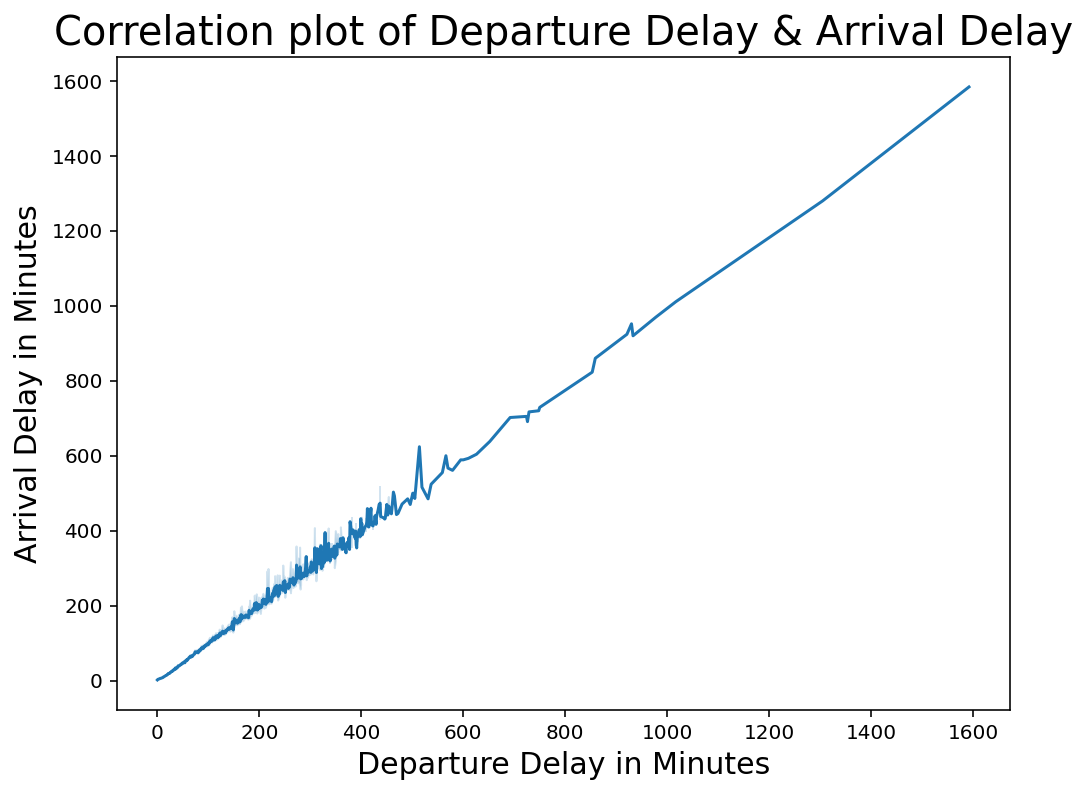

In [11]:
# 출발이 지연된 시간만큼 그대로 도착시간도 예정도착시간보다 지연될 것이라 생각한다. 실제 두 특성간의 상관관계를 살펴보고 결측치 대치방법을 정하도록 하자.

# 결측치 제외 임시 데이터프레임 생성
df_tmp=train.loc[~train['Arrival_Delay_in_Minutes'].isna()]

plt.figure(figsize=(8,6))
sns.lineplot(data=df_tmp,x='Departure_Delay_in_Minutes',y='Arrival_Delay_in_Minutes' )
plt.xlabel('Departure Delay in Minutes',fontsize=15) ; plt.ylabel('Arrival Delay in Minutes',fontsize=15)
plt.title('Correlation plot of Departure Delay & Arrival Delay',fontsize=20)
plt.show()

In [12]:
# Train set의 Arrival Delay in Minutes 컬럼의 결측치는 Departure Delay in Minutes와 같은 값으로 대치해주도록 하자
train_imputed=train.copy()
train_imputed['Arrival_Delay_in_Minutes'] = train['Arrival_Delay_in_Minutes'].fillna(train['Departure_Delay_in_Minutes'])

# test set에서도 같은 방법으로 결측치를 처리하면 데이터 누수에 해당하기 때문에,train set의 평균값으로 최빈값으로 대치해 주기로 결정
# 해당 특성의 50% 이상의 데이터들이 최빈값인 0을 가지므로 최빈값 대치를 해주는게 좋다고 생각했음.
test_imputed=test.copy()
test_imputed['Arrival_Delay_in_Minutes'] = test['Arrival_Delay_in_Minutes'].copy().fillna(train_imputed['Departure_Delay_in_Minutes'].mode()[0])

print("missing values in train set: {}, in test set: {}".format(train_imputed['Arrival_Delay_in_Minutes'].isna().sum(),test_imputed['Arrival_Delay_in_Minutes'].isna().sum()))

missing values in train set: 0, in test set: 0


## 중복치 확인

In [13]:
print("duplicates in train set: {}, in test set: {}".format(train_imputed.duplicated().sum(), test_imputed.duplicated().sum()))

duplicates in train set: 0, in test set: 0


## 데이터타입 변경

In [14]:
def typechange(df):
    #Arrival_Delay_in_Minutes 컬럼 int로 변경
    df.Arrival_Delay_in_Minutes  = df.Arrival_Delay_in_Minutes.astype(int)
    #타겟을 중립,불만족을 0으로 만족을 1로 변경. 그 후 타입변경
    df.satisfaction = df.satisfaction.replace({'neutral or dissatisfied': 0, 'satisfied': 1}).astype(int)
    return df

train_change = typechange(train_imputed) ; test_change = typechange(test_imputed)

In [15]:
train_change.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   id                                 103904 non-null  int64 
 1   Gender                             103904 non-null  object
 2   Customer_Type                      103904 non-null  object
 3   Age                                103904 non-null  int64 
 4   Type_of_Travel                     103904 non-null  object
 5   Class                              103904 non-null  object
 6   Flight_Distance                    103904 non-null  int64 
 7   Inflight_wifi_service              103904 non-null  int64 
 8   Departure/Arrival_time_convenient  103904 non-null  int64 
 9   Ease_of_Online_booking             103904 non-null  int64 
 10  Gate_location                      103904 non-null  int64 
 11  Food_and_drink                     103904 non-null  

## 이상치 확인

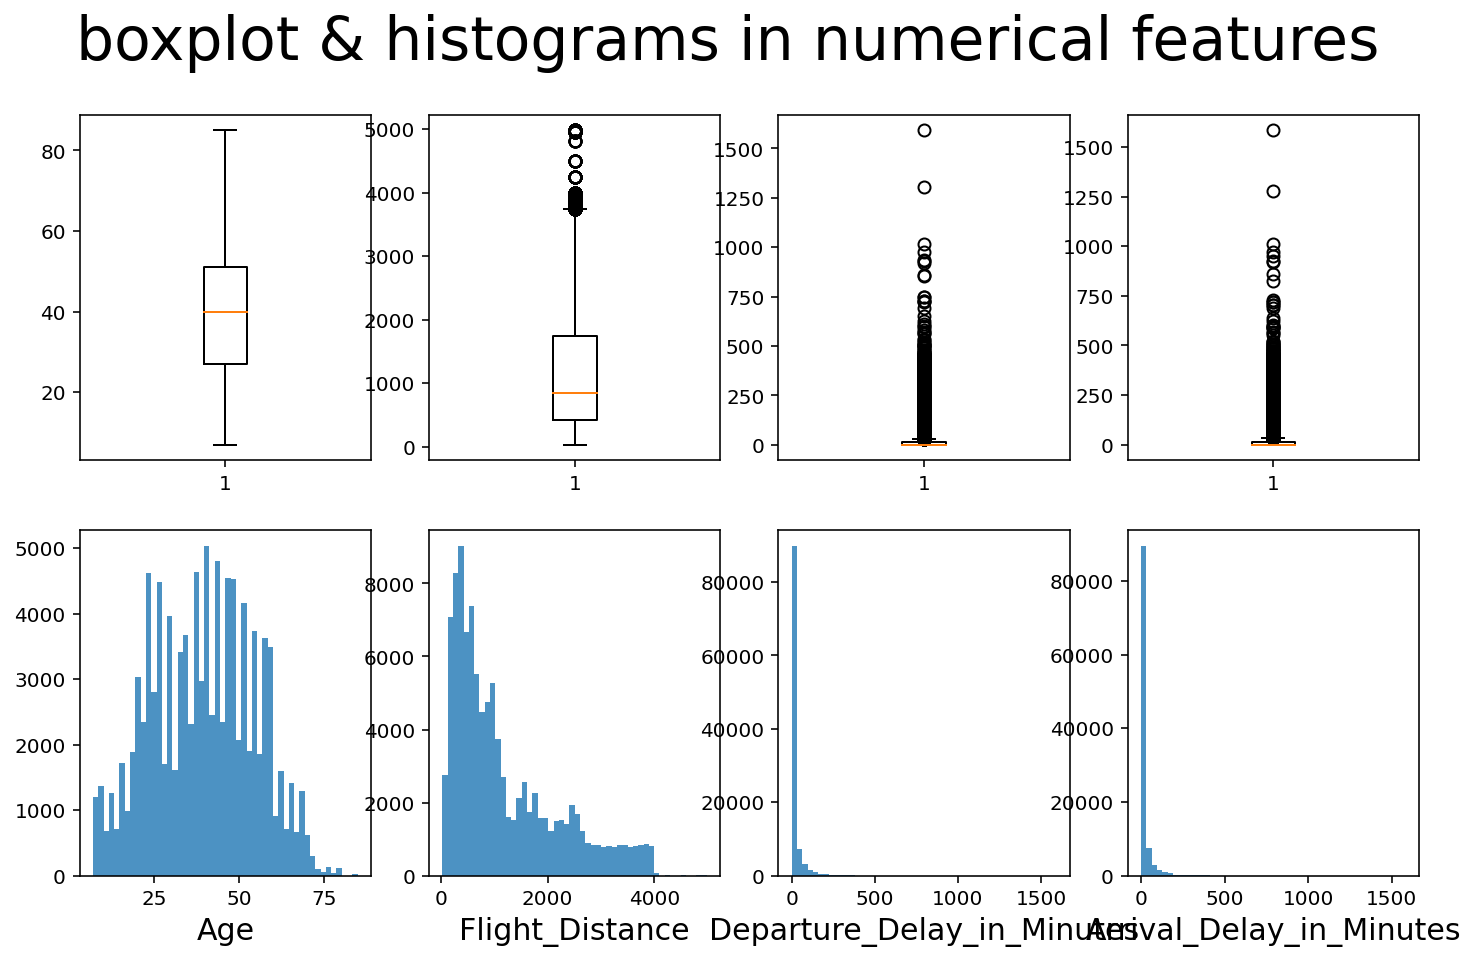

In [16]:
# train set의 수치형 데이터의 이상치를 확인한다.
num_cols = ['Age','Flight_Distance','Departure_Delay_in_Minutes','Arrival_Delay_in_Minutes']

fig, axs = plt.subplots(2,4,figsize=(12,7))

for i in range(4):
    axs[0,i].boxplot(train_change[num_cols[i]])
    axs[1,i].hist(train_change[num_cols[i]],bins=50,alpha=0.8)
    axs[1,i].set_xlabel(num_cols[i],fontsize=15)

fig.suptitle("boxplot & histograms in numerical features",fontsize=30)
plt.show()

나이분포에는 딱히 이상치로 보이는 데이터가 없었다.  
비행거리의 이상치는 단거리의 경우 미국 내 최단항로를 찾아보니 30마일 항로도 존재하며, 장거리의 경우도 기상상태 등 조건에 따라 우회항로를 선택하거나, 동부에서 하와이로 가는 장기노선 등의 경우가 있기때문에 이상치로 생각하지 않고 그대로 두는것이 좋다고 생각했다.  
출발/도착시간 지연은 50% 이상의 데이터가 0의 값을 가지지만, 1600분 정도되는 지연시간도 존재했는데, 실제로 27시간 가까이 지연되는 경우가 드물게 있으므로 모든 값을 이상치로 간주하지 않을 생각이다.  

In [17]:
#범주형 특성 이상치 확인
pd.DataFrame(train_change.drop(columns=num_cols).drop(['id','satisfaction'],axis=1).nunique(),columns=['Count_of_unique_values'])

,Count_of_unique_values
Gender,2
Customer_Type,2
Type_of_Travel,2
Class,3
Inflight_wifi_service,6
Departure/Arrival_time_convenient,6
Ease_of_Online_booking,6
Gate_location,6
Food_and_drink,6
Online_boarding,6


## 특성과 타겟의 상관관계를 시각화로 살펴보기

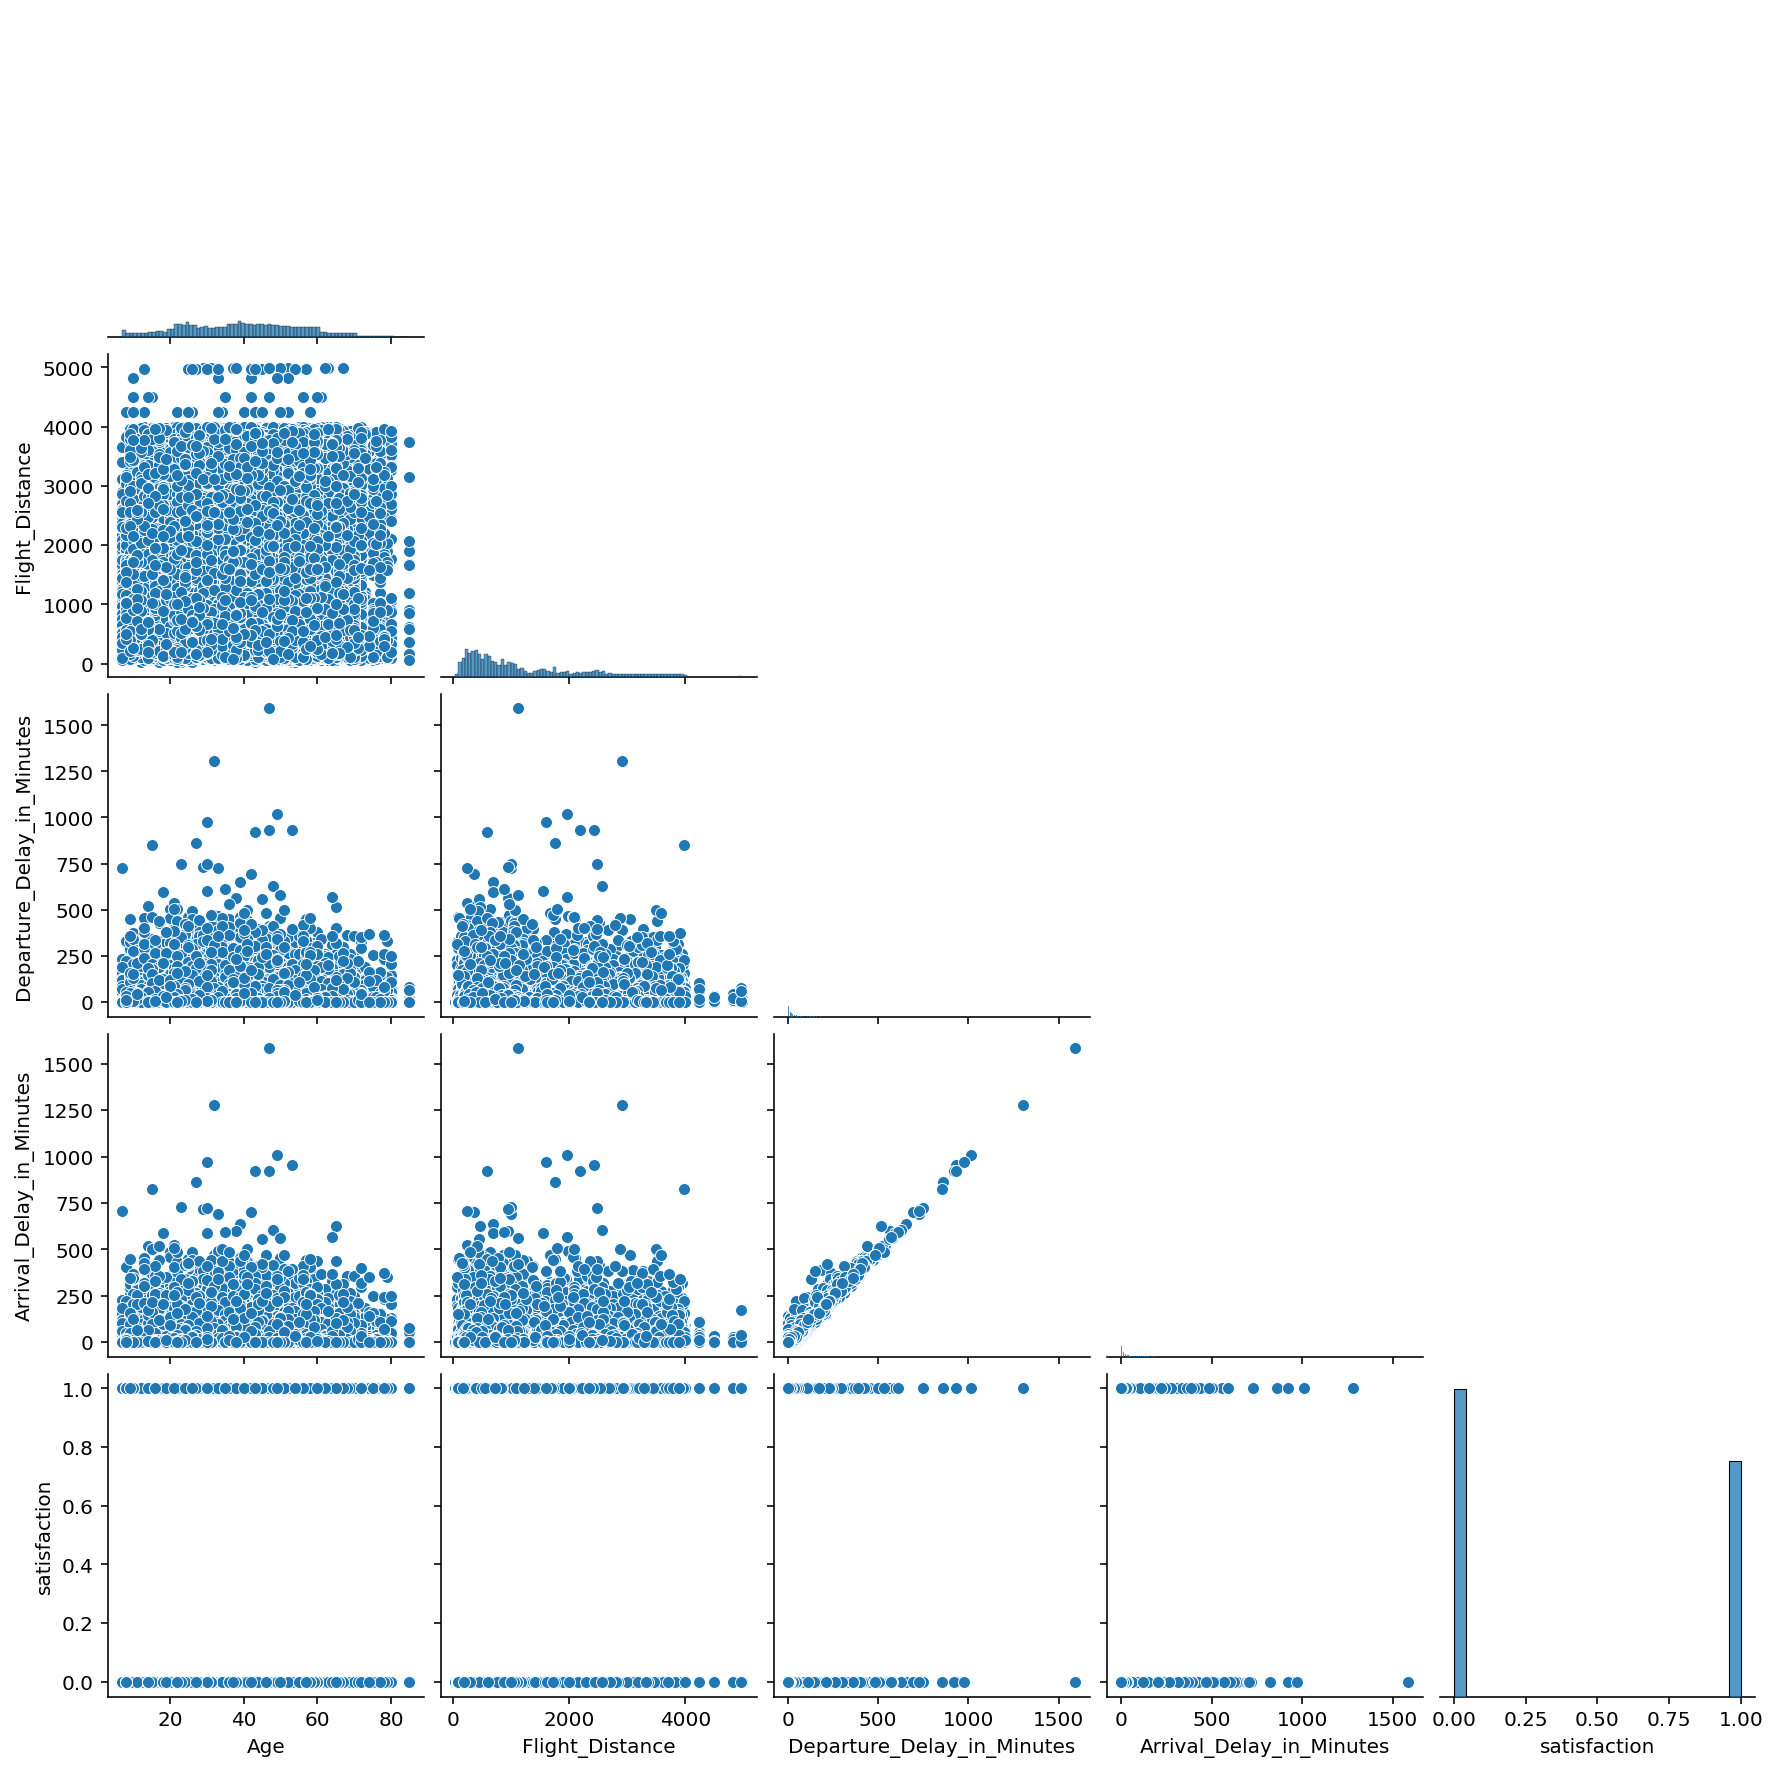

In [18]:
pair_cols = num_cols.copy()
pair_cols.append('satisfaction')

# pair plot으로 수치형 변수와 타겟의 상관관계를 확인해보자
sns.pairplot(train_change[pair_cols],corner=True)

결측치 처리시에도 확인한 대로 출발지연시간과 도착지연시간은 아주 높은 상관관계를 가지고 있다.   
두 특성의 평균을 새로운 특성으로 추출하고 기존 특성을 삭제하면, 모델의 일반화 성능을 높이고 모델 해석 단계에서 더 정확한 해석이 가능해진다.  

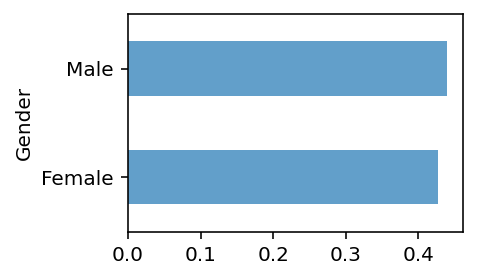

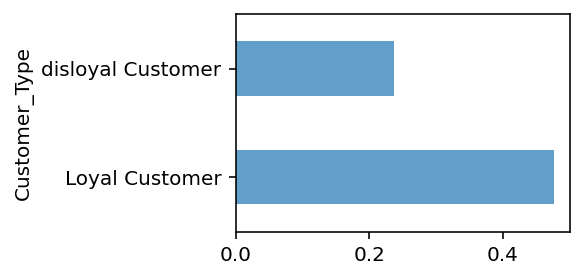

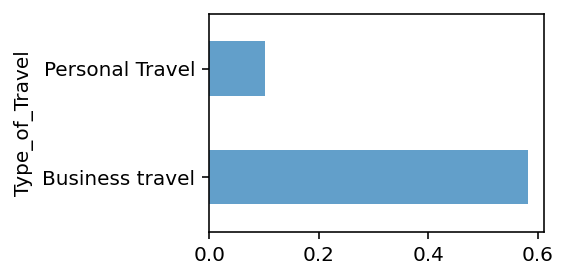

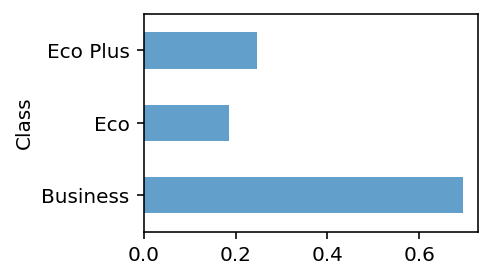

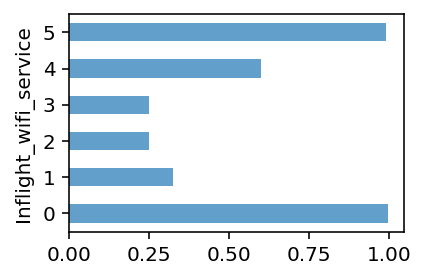

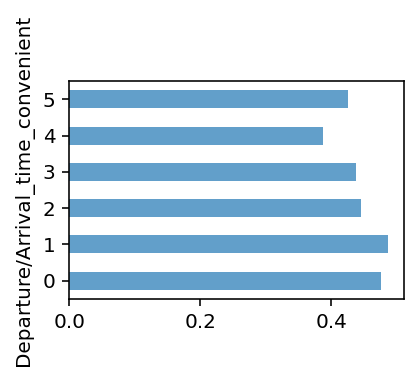

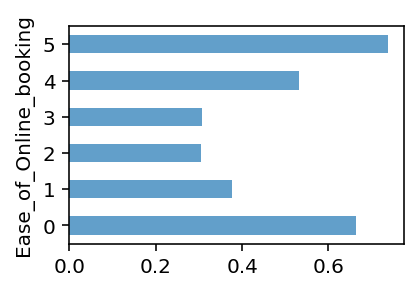

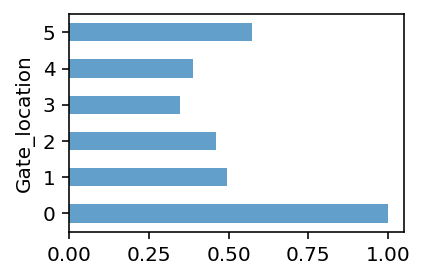

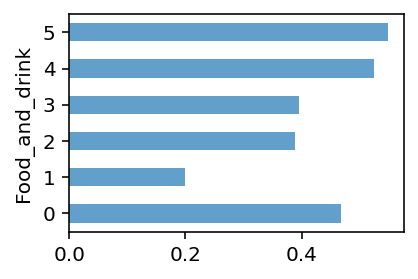

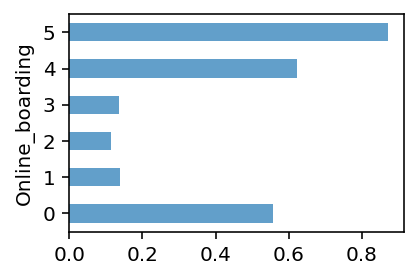

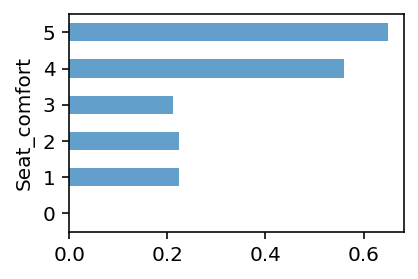

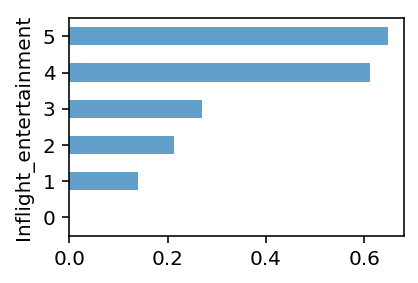

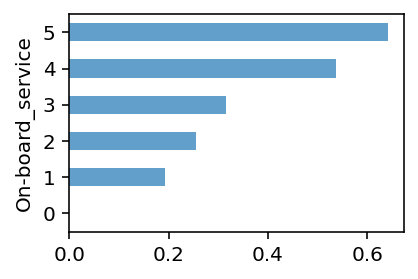

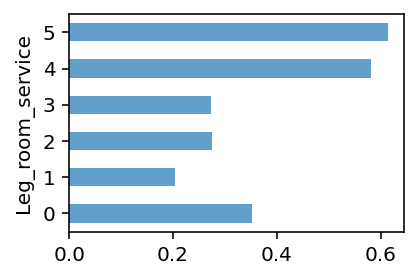

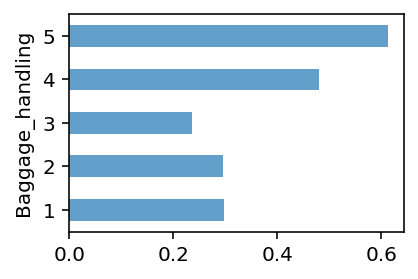

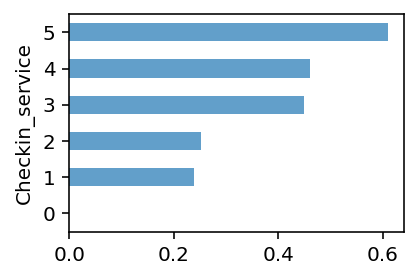

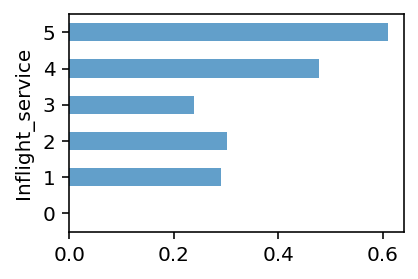

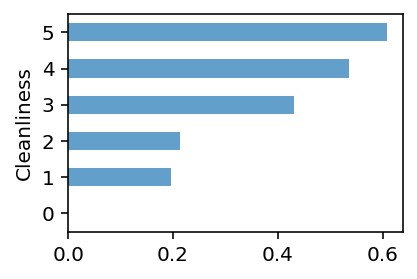

In [19]:
# 명목형 변수별 만족도의 평균 barplot을 그려서 타겟과의 관계를 확인해 봅니다.
cat_cols = ['Gender', 'Customer_Type', 'Type_of_Travel', 'Class',
       'Inflight_wifi_service', 'Departure/Arrival_time_convenient',
       'Ease_of_Online_booking', 'Gate_location', 'Food_and_drink',
       'Online_boarding', 'Seat_comfort', 'Inflight_entertainment',
       'On-board_service', 'Leg_room_service', 'Baggage_handling',
       'Checkin_service', 'Inflight_service', 'Cleanliness']
for i in range(len(cat_cols)):
    plt.figure(figsize=(3, 2))
    train_change.groupby(cat_cols[i]).mean()["satisfaction"].plot.barh(alpha=0.7)
    plt.show()

위 시각화를 통해 일부 가설(충성고객의 만족도 경향, 좌석 클래스에 따른 비행 만족도)이 확인가능하다. 아래에서 더 자세한 시각화를 통해 확인해 볼 예정이다. 

## 가설 해결을 위한 시각화 과정

### 가설1. 비행 거리가 짧을수록 비행 만족도가 높을것이다 확인

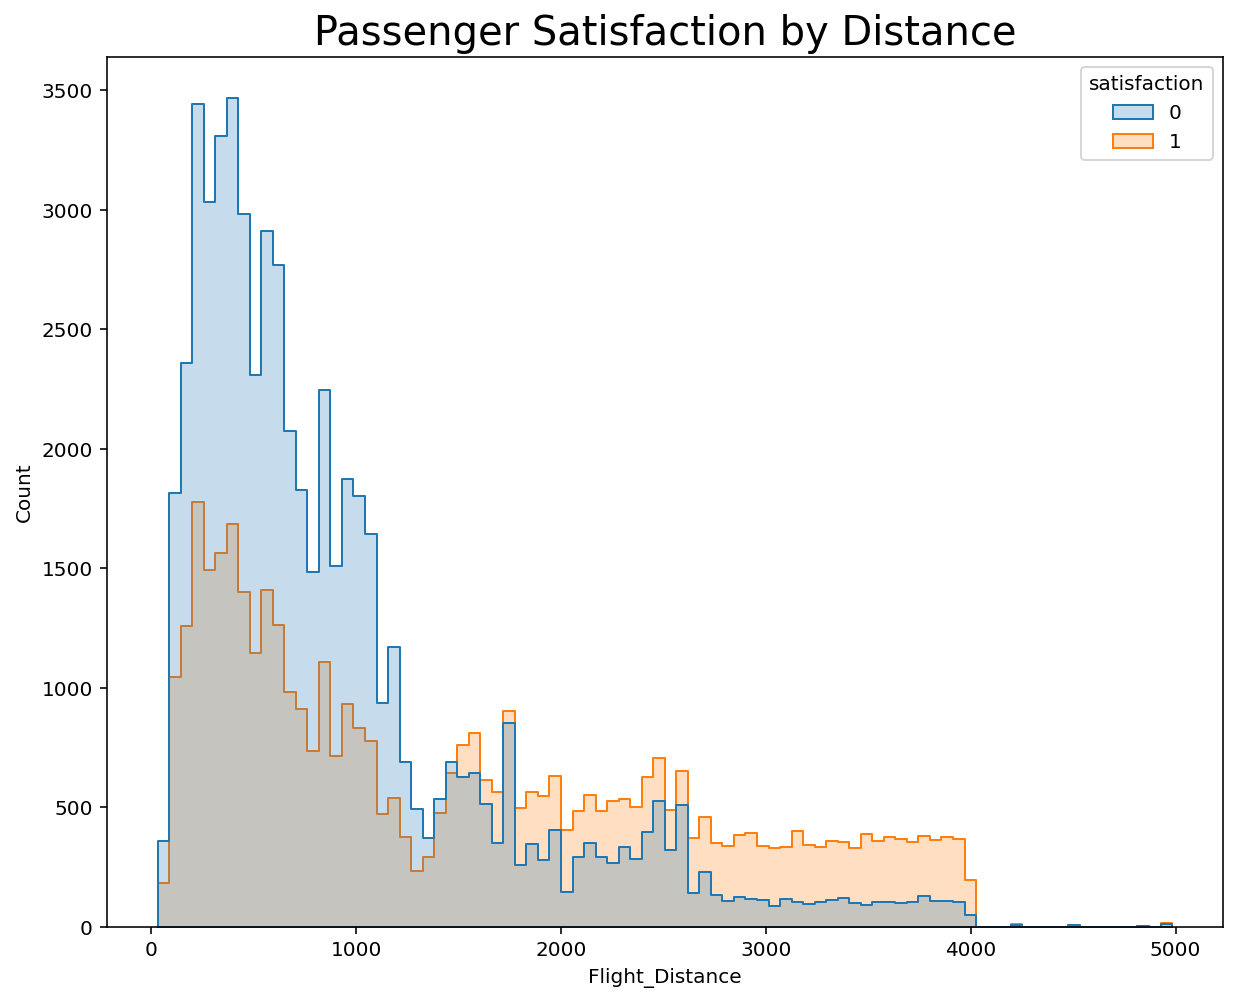

In [20]:
df_tmp=train_change[['Flight_Distance','satisfaction']]

plt.figure(figsize=(10,8))
sns.histplot(data=df_tmp, x='Flight_Distance',hue='satisfaction',element='step' )
plt.title('Passenger Satisfaction by Distance',fontsize=20)
plt.show();

가설과는 달리 장거리 비행에서 전반적으로 만족도 수치가 높은 경향을 보인다.

### 가설2. 충성고객일수록 비행 만족도가 높을것이다.

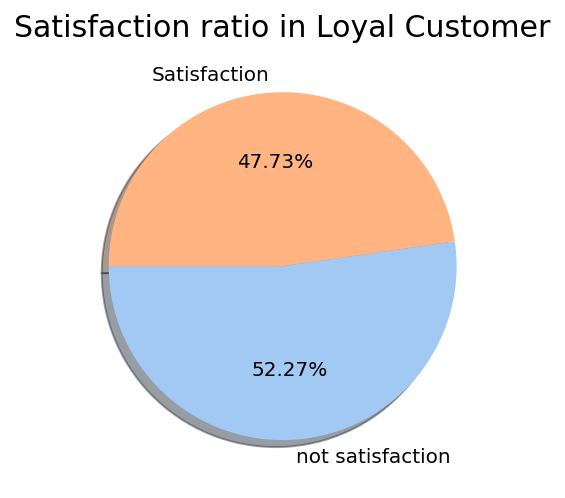

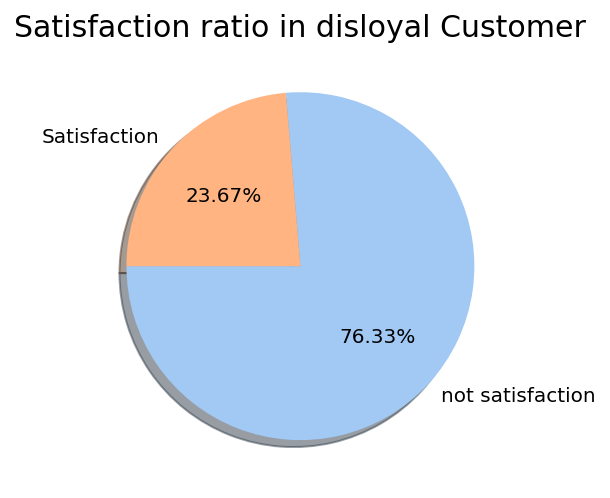

In [26]:
pie_Ctype = train_change.groupby(['Customer_Type'])['satisfaction'].value_counts()

plt.pie(
        (pie_Ctype[0], pie_Ctype[1]),
        labels=('not satisfaction','Satisfaction'),
        autopct="%.2f%%",
        shadow=True,
        startangle=180,
        colors = sns.color_palette('pastel')
    )
plt.title("Satisfaction ratio in Loyal Customer", size=15)
plt.show()

plt.pie(
        (pie_Ctype[2], pie_Ctype[3]),
        labels=('not satisfaction','Satisfaction'),
        autopct="%.2f%%",
        shadow=True,
        startangle=180,
        colors = sns.color_palette('pastel')
    )
plt.title("Satisfaction ratio in disloyal Customer", size=15)
plt.show()

충성 고객이 비충성 고객에 비해 비행 만족도가 높은 편인것을 확인할 수 있다.  
하지만 충성 고객이더라도 만족도 : 불만족도 비율은 1:1 정도로 충성 고객 여부가 만족도를 결정하는 데에 아주 큰 영향을 준다고는 볼 수 없다.


### 가설3. 높은 클래스의 좌석일 수록 비행 만족도가 높을 것이다.

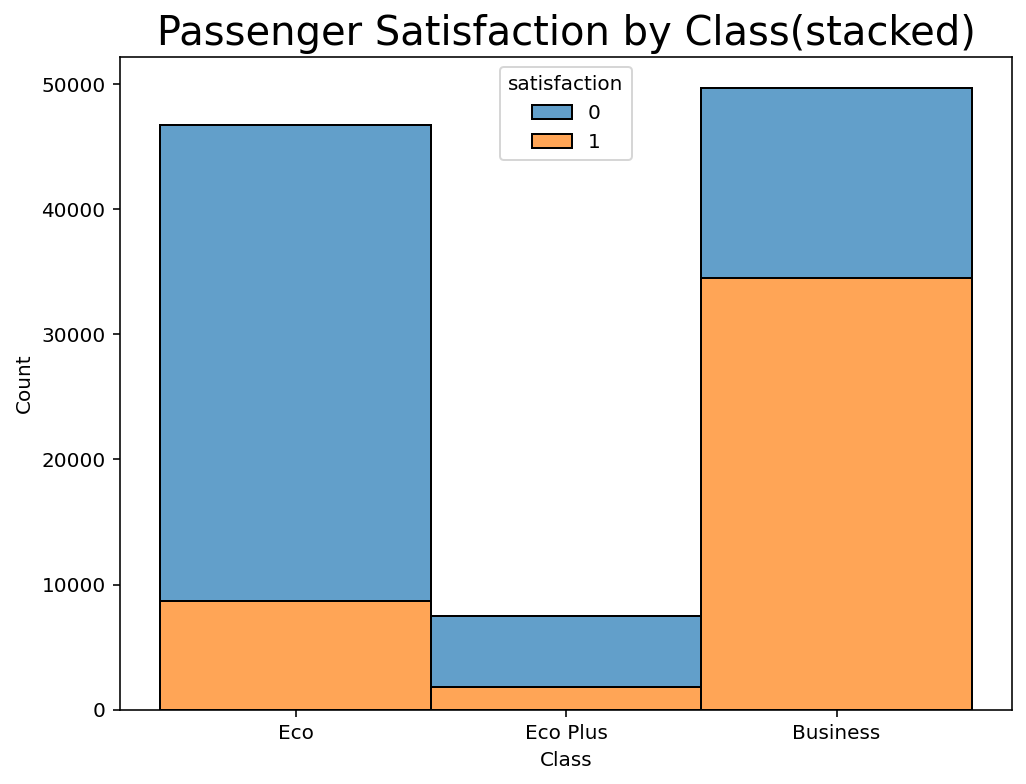

In [22]:
df_tmp=train_change.loc[:,['Class','satisfaction']]
df_tmp['Class'] = pd.Categorical(df_tmp['Class'],
                                   categories=['Eco', 'Eco Plus','Business'],
                                   ordered=True)

plt.figure(figsize=(8,6))
g = sns.histplot(data=df_tmp, x='Class',hue='satisfaction',multiple='stack', alpha=0.7)
plt.xticks([0,2,1])
plt.title('Passenger Satisfaction by Class(stacked)',fontsize=20)
plt.show();

가설대로 높은 클래스의 좌석일 수록 비행 만족도가 높은것을 명확히 학인 할 수 있다.

나머지 가설들은 머신러닝 모델링이 완성되고 모델을 해석하면서 해결하도록 하겠습니다.

## Feature Engineering

In [23]:
# Feature Engineering & Feature Selection
def FE(df):

    # 평균 평점 추가 (0,1~5로 평가하는 항목들의 평균)
    df['Overall_Rating'] = df.iloc[:,7:21].mean(axis=1)
    # 평균 지연시간 특성 추가
    df['Average_delay'] = (df.Departure_Delay_in_Minutes + df.Arrival_Delay_in_Minutes)/2
    
    # 머신러닝에 필요없는 특성 삭제
    dels = ['id','Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes']
    df.drop(columns=dels, inplace=True)

    return df

train_FE = FE(train_change) ; test_FE = FE(test_change)

## 타겟 분포 확인

train과 test 두 데이터셋에서 타겟 비율이 거의 비슷함을 확인 할 수 있다.

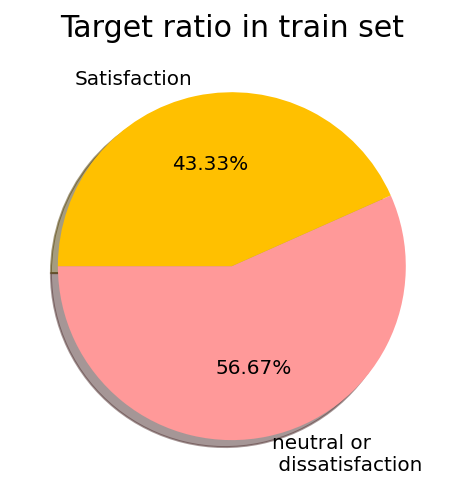

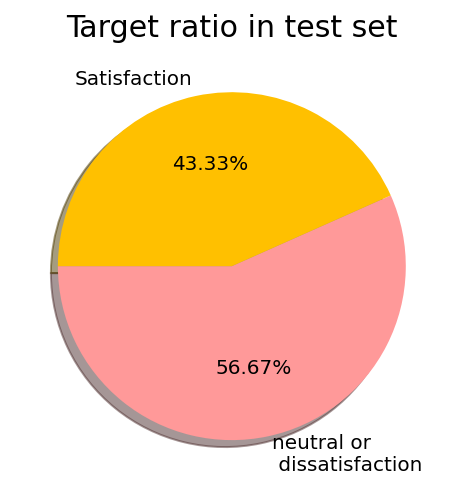

In [24]:
def target_ratio(df):

    n_zero_label = df["satisfaction"].value_counts()[0]
    n_one_label  = df["satisfaction"].value_counts()[1]

    plt.pie(
        (n_zero_label, n_one_label),
        labels=('neutral or \n dissatisfaction','Satisfaction'),
        autopct="%.2f%%",
        startangle=180,
        shadow=True,
        colors = ['#ff9999', '#ffc000']
    )
    return None

target_ratio(train_FE)
plt.title("Target ratio in train set", size=15)
plt.show()
target_ratio(train_FE)
plt.title("Target ratio in test set", size=15)
plt.show()

## 전처리 완료된 CSV파일 생성

In [25]:
train_FE.to_csv('train_processed.csv',index=False)
test_FE.to_csv('test_processed.csv',index=False)